# Assignment - Computing ACF & CCF of time series signals {-}
### Manas Vashistha (17D070064) {-}

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Code  {-}
The Correlation class below implements the following methods-

- **__init__**(self, algo): Initializes a Correlation object. **algo** = **'acf'** or **'ccf'**.

- __call__(self, x, tau, y): This function takes 2 parameters if algo = **acf** and 3 parameters if algo = **ccf** and one additional parameter **tau**(lag) for which the **acf** or **ccf** needs to be printed.

## Assignment 01 functions- {-}
- **acf**(self, x): Returns the normalized acf of a time series signal **x** over integer values in the interval (-100, 100).

- **ccf**(self, x, y): Returns the normalized ccf of time series signal **x** & **y** over integer values in the interval (-100, 100).

## Assignment 02 functions- {-}
- **autocorrelate**(self,x): Returns the acf computed using **numpy.correlate**(x, x, 'full') after normalization.

- **crosscorrelate**(self, x, y): Returns the ccf  of x & y computed using **numpy.correlate**(x, y, 'full') after normalization.

## Plotting function- {-}

- **plot**(self): Plots the values of acf/ccf w.r.t integer values in the interval (-100, 100).



# Algorithms {-}

- Let **X** and **Y** be two distinct time series signals of dimensions 1xM and 1xN respectively.

## Computng ACF {-}

- We iterate using a variable $\tau\,\epsilon\,[0, M-1]$ such that-

> $\phi(\tau)$ = **X**\[$\tau$:\] **X'**\[:$M-\tau$\]

- Then we use the property $\phi(\tau)$ = $\phi(-\tau)$ to get the remaining values in the ACF.

## Computng CCF {-}

- First iteration with variable $\tau \,\epsilon\, [0, M-1]$, we obtain-

> $\phi(\tau)$ = **X**\[$\tau$:$N + \tau$\] **Y'**\[:$\min$($size$(**X**\[$\tau$:$N + \tau$\]), N)\]

- We store all these values in a list (say $A$).

- Second iteration with variable $i\,\epsilon\,[0, N-1]$, we obtain-

> $\mu(\tau)$ = **Y**\[$i$:$M + i$\] **X'**\[:$\min$($size$(**Y**\[$i$:$M + i$\]), M)\]

- We store all these values in a list (say $B$).

- On reverting $B$ we get $\phi(-\tau)$ where $\tau\,\epsilon\,[0, N-1]$

- We combine $A$ and $B$ and remove one instance of $\phi(0)$ as it is present in both $A$ and $B$ to obtain the final CCF over all the valid integer values of $\tau$ i.e. $\tau\,\epsilon\,[-N+1, M-1]$.

Finally we divide all the values obtained by either **ACF** or **CCF** by the maximum value of list to normalize the function as follows-

> $\phi(\tau_{i})$ = $\frac{\phi(\tau_{i})}{\max_{\tau_{j}}(\phi(\tau_{j}))}$



In [5]:
class Correlation(object):

    def __init__(self, algo):
        self.outputs = None
        self.tau = None
        self.step = 0
        self.algo = algo

    def __call__(self, x, tau, y=[]):
        self.tau = tau
        self.myOps = []
        self.ibOps = []
        
        self.abscissa = []

        if self.algo == 'acf':
            self.myOps = self.acf(x)
            self.ibOps = self.autocorrelate(x)

            if abs(tau) >= x.shape[0]:
                myOut = 0
                ibOut = 0
            else:
                myOut = self.myOps[tau + x.shape[0] -1]
                ibOut = self.ibOps[tau + x.shape[0] -1]
            
            if 2*x.shape[0]-1 > 200:
                self.myAbscissa = self.myOps[x.shape[0]-101:x.shape[0]+99]
                self.ibAbscissa = self.myOps[x.shape[0]-101:x.shape[0]+99]
                self.ordinates = np.arange(-100, 100)
            else:
                self.myAbscissa = self.myOps
                self.ibAbscissa = self.myOps
                self.ordinates = np.arange(-x.shape[0]+1, x.shape[0])
            
            print('\n\tACF value (my implementation)    for %d -> %f' %(tau, myOut))
            print('\n\tACF value (numpy implementation) for %d -> %f' %(tau, ibOut))

            self.plot()

        else:
            if len(y) == 0:
                print('Correlation("ccf") take 3 positional arguments but 2 were given\n')
            else:
                self.myOps = self.ccf(x, y)
                self.ibOps = self.crosscorrelate(x, y)

                if tau <= -y.shape[0] or tau >= x.shape[0]:
                    myOut1 = 0
                    ibOut1 = 0
                else:
                    myOut1 = self.myOps[tau + y.shape[0] - 1]
                    ibOut1 = self.ibOps[tau + y.shape[0] -1]
                if -tau <= -y.shape[0] or -tau >= x.shape[0]:
                    myOut2 = 0
                    ibOut2 = 0
                else:
                    myOut2 = self.myOps[-tau + y.shape[0] - 1]
                    ibOut2 = self.ibOps[-tau + y.shape[0] -1]
                
                if y.shape[0] > 100:
                    if x.shape[0] > 100:
                        self.myAbscissa = self.myOps[y.shape[0]-101:y.shape[0]+99]
                        self.ibAbscissa = self.myOps[y.shape[0]-101:y.shape[0]+99]
                        self.ordinates = np.arange(-100, 100)
                    else:
                        self.myAbscissa = self.myOps[y.shape[0]-101:]
                        self.ibAbscissa = self.myOps[y.shape[0]-101:]
                        self.ordinates = np.arange(-100, x.shape[0])
                else:
                    if x.shape[0] > 100:
                        self.myAbscissa = self.myOps[:y.shape[0]+99]
                        self.ibAbscissa = self.myOps[:y.shape[0]+99]
                        self.ordinates = np.arange(-y.shape[0]+1, 100)
                    else:
                        self.myAbscissa = self.myOps
                        self.ibAbscissa = self.myOps
                        self.ordinates = np.arange(-y.shape[0]+1, x.shape[0])
                
                print('\n\tCCF value (my implementation)    for %d    -> %f' %(tau, myOut1))
                print('\n\tCCF value (numpy implementation) for %d -> %f' %(tau, ibOut1))
                print('\n\tCCF value (my implementation)    for %d    -> %f' %(-tau, myOut2))
                print('\n\tCCF value (numpy implementation) for %d -> %f' %(-tau, ibOut2))

                self.plot()

    def acf(self, x):
        out = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            out[i] = x[i:] @ x[:x.shape[0] - i]
        
        out = np.flip(out).tolist()[:-1] + out.tolist()
        # print(out)
        return np.array(out) / max(out)

    def ccf(self, x, y):
        out = np.zeros(x.shape[0])
        out_pre = np.zeros(y.shape[0])
        for i in range(x.shape[0]):
            j = y.shape[0] + i
            k = min(x[i:j].shape[0], y.shape[0])
            out[i] = x[i:j] @ y[:k]

        for i in range(y.shape[0]):
            j = x.shape[0] + i
            k = min(y[i:j].shape[0], x.shape[0])
            out_pre[i] = y[i:j] @ x[:k]

        out = np.flip(out_pre).tolist()[:-1] + out.tolist()
        # print(out)
        return np.array(out) / max(out)

    def autocorrelate(self, x):
        out = np.correlate(x, x, 'full') 
        # print(out)
        return out / max(out)
        
    def crosscorrelate(self, x, y):
        out = np.correlate(x, y, 'full') 
        # print(out)
        return out / max(out)

    def plot(self):
        if self.algo == 'acf':
            msg = r'$\phi(\tau)$ (ACF values)'
            name = 'ACF_' + str(self.tau) + '.png'
        else:
            msg = r'$\phi(\tau)$ (CCF values)'
            name = 'CCF_' + str(self.tau) + '.png'

        line1, = plt.plot(self.ordinates, self.myAbscissa, 'y-')
        line2, = plt.plot(self.ordinates, self.ibAbscissa, 'r:', ms=10)
        plt.savefig(name)
        plt.ylabel(msg)
        plt.xlabel(r'$\tau$ (Time Lag)')
        plt.legend((line1, line2), ('Implemented function', 'Inbuilt function'))
        plt.show()
        

# Input format-  {-}

1. Run the file in the terminal using `python3 assign1.py`

2. Enter **0** for providing input using a **.txt file** or, **1** for providing input in terminal.

## Terminal input format- {-}

1. Enter three space seperated integers **least_value** **max_value** **size** for series A.

2. Enter an integer specifying the value of **tau**.

3. Enter the algo type **acf** or **ccf**.

    - If algo type **ccf**, enter three space seperated integers **least_value** **max_value** **size** for series B.

## Input file format- {-}

Multiple inputs can be provided at once and plots of all can be viewed in a sequential manner. Sample input format shown below-

    0 20 10
    5
    acf
    0 100 500
    65
    ccf
    0 50 75

> Line 1 specifies the **least_value** **max_value** **size** for series A for first input. Line 2 is the value of **tau**. Line 3 is the algo type. If **acf** then first input ends here.

> Line 4 specifies the **least_value** **max_value** **size** for series A for secod input. Line 5 is the value of **tau**. Line 6 is the algo type. If **ccf** then the next line should contain **least_value** **max_value** **size** for series B.


## Sample input file (input.txt) {-}

    -500 500 5000
    4000
    acf
    -500 500 5000
    -4000
    acf
    -500 500 5000
    4000
    ccf
    -500 500 5000
    -500 500 5000
    -4000
    ccf
    -500 500 5000

After we run the code for this sample input we get the plots as shown below-


	ACF value (my implementation)    for 4000 -> -0.002125

	ACF value (numpy implementation) for 4000 -> -0.002125


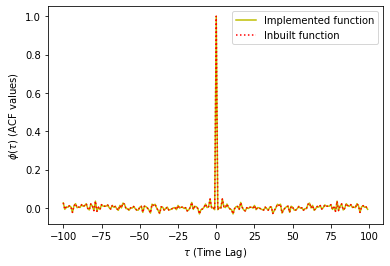


	ACF value (my implementation)    for -4000 -> 0.000945

	ACF value (numpy implementation) for -4000 -> 0.000945


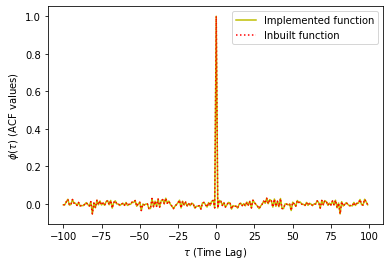


	CCF value (my implementation)    for 4000    -> 0.112322

	CCF value (numpy implementation) for 4000 -> 0.112322

	CCF value (my implementation)    for -4000    -> -0.324825

	CCF value (numpy implementation) for -4000 -> -0.324825


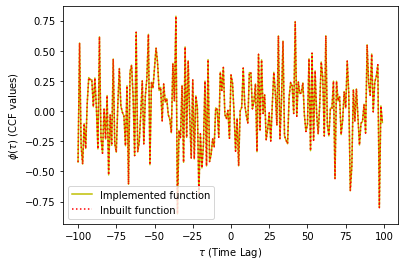


	CCF value (my implementation)    for -4000    -> 0.018558

	CCF value (numpy implementation) for -4000 -> 0.018558

	CCF value (my implementation)    for 4000    -> 0.117224

	CCF value (numpy implementation) for 4000 -> 0.117224


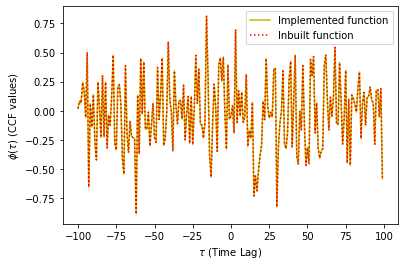

In [6]:
if __name__ == '__main__':
    option = bool(int(input('Choose one of the following options \n\t 0 -> Use a text file to provide input\n\t 1 -> Provide input in terminal\n')))
    np.random.seed(99)
    if option:
        first_samp_i, last_samp_i, num_samp_i = [int(i) for i in input("Enter LeastValue  MaximumValue  Size for sequence A:\n").strip().split()]
        data_i = np.random.randint(first_samp_i, last_samp_i, num_samp_i)
        # print(data_i)
        tau = int(input('Enter a value for lag(tau):\n'))
        algo = str(input("Enter the type of Correlation, 'acf' or 'ccf'\n"))
        if algo == 'ccf':
            first_samp_j, last_samp_j, num_samp_j = [int(i) for i in input("Enter LeastValue  MaximumValue  Size for sequence B:\n").strip().split()]
            data_j = np.random.randint(first_samp_j, last_samp_j, num_samp_j)
            # print(data_j)
            corr = Correlation('ccf')
            corr(data_i, tau, data_j)
        elif algo == 'acf':
            corr = Correlation('acf')
            corr(data_i, tau)
        else:
            print('UndefinedParameter passed. Valid values are "acf" and "ccf"\n')
    else:
        f = str(input('Provide location of the input file\n').strip())
        file = open(f, 'r')
        line = file.readline()
        while line:
            first_samp_i, last_samp_i, num_samp_i = [int(i) for i in line.strip().split()]
            data_i = np.random.randint(first_samp_i, last_samp_i, num_samp_i)
            tau = int(file.readline().strip())
            algo = str(file.readline().strip())
            if algo == 'ccf':
                first_samp_j, last_samp_j, num_samp_j = [int(i) for i in file.readline().strip().split()]
                data_j = np.random.randint(first_samp_j, last_samp_j, num_samp_j)
                # print(data_j)
                corr = Correlation('ccf')
                corr(data_i, tau, data_j)
            elif algo == 'acf':
                corr = Correlation('acf')
                corr(data_i, tau)
            else:
                print('UndefinedParameter passed. Valid values are "acf" and "ccf"\n')
            line = file.readline()